In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

dataset=pd.read_csv("F:\\Machine Learning\\data\\Social_Network_Ads.csv")
print(dataset)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
5    15728773    Male   27            58000          0
6    15598044  Female   27            84000          0
7    15694829  Female   32           150000          1
8    15600575    Male   25            33000          0
9    15727311  Female   35            65000          0
10   15570769  Female   26            80000          0
11   15606274  Female   26            52000          0
12   15746139    Male   20            86000          0
13   15704987    Male   32            18000          0
14   15628972    Male   18            82000          0
15   15697686    Male   29            80000          0
16   15733883    Male   47            25000          1
17   15617

In [3]:
x= dataset.iloc[:,[2,3]].values
y= dataset.iloc[:,4].values

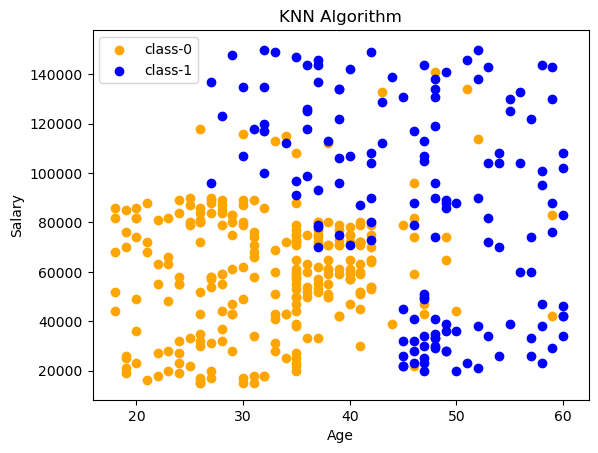

In [6]:
plt.scatter(x[y==0,0],x[y==0,1],color="orange",label="class-0")
plt.scatter(x[y==1,0],x[y==1,1],color="blue",label="class-1")
plt.legend()
plt.title("KNN Algorithm")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()


In [7]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [8]:
#train test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [9]:
#KNN fit algorithm
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5, metric="minkowski",p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [10]:
#prediction
y_pred=knn.predict(x_test)


In [11]:
#confusion matrix use for test accuracy in classification
from sklearn.metrics import confusion_matrix
mx=confusion_matrix(y_test,y_pred)
print(mx)


[[60 10]
 [ 5 25]]


In [12]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
print(ac)

0.85


In [13]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        70
           1       0.71      0.83      0.77        30

    accuracy                           0.85       100
   macro avg       0.82      0.85      0.83       100
weighted avg       0.86      0.85      0.85       100



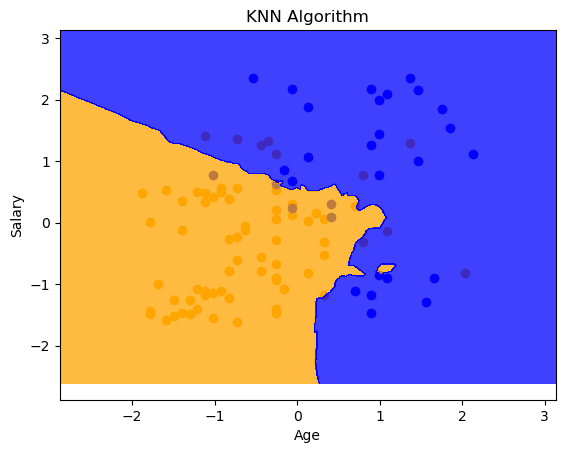

In [19]:
#visualisation of train and test
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train

plt.scatter(x_test[y_test==0,0],x_test[y_test==0,1],color="orange",label="class-0")
plt.scatter(x_test[y_test==1,0],x_test[y_test==1,1],color="blue",label="class-1")                   


x1,x2=np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop = x_set[:,0].max()+1, step =0.01),
                  np.arange(start = x_set[:,1].min()-1,stop = x_set[:,1].max()+1, step =0.01))
plt.contourf(x1 ,x2,knn.predict (np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha =0.75, cmap = ListedColormap(("orange","blue")))
plt.xlim(x1.min(),x1.max())
plt.ylim(x1.min(),x1.max())
plt.title("KNN Algorithm")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()